In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_values

review       0
sentiment    0
dtype: int64

In [7]:
import numpy as np
import pandas as pd
class_counts = df['sentiment'].value_counts()
class_percentages = class_counts / len(df) * 100
threshold = 80
balanced_classes = class_percentages[class_percentages < threshold]
if len(balanced_classes) == 0:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")
    print("balanced classes:")
    print(balanced_classes)

The dataset is balanced.
balanced classes:
positive    50.0
negative    50.0
Name: sentiment, dtype: float64


In [8]:
pip install nltk


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stop words and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Example sentence
sentence = "This is an example sentence with some stop words"

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Remove stop words from the sentence
filtered_sentence = [word for word in words if word.lower() not in stop_words]

# Join the filtered words to form a sentence
filtered_sentence = ' '.join(filtered_sentence)

print("Original Sentence:", sentence)
print("Filtered Sentence:", filtered_sentence)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Sentence: This is an example sentence with some stop words
Filtered Sentence: example sentence stop words


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample movie reviews dataset
data = ["The movie was great and exciting.",
        "The plot was weak and the characters were boring.",
        "I loved the acting and the storyline."]

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["Review"])

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the data using TF-IDF Vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review'])

# Get feature names (words) from the TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF DataFrame
print(tfidf_df)


    acting  boring  characters  exciting    great    loved    movie  plot  \
0  0.00000     0.0         0.0   0.57735  0.57735  0.00000  0.57735   0.0   
1  0.00000     0.5         0.5   0.00000  0.00000  0.00000  0.00000   0.5   
2  0.57735     0.0         0.0   0.00000  0.00000  0.57735  0.00000   0.0   

   storyline  weak  
0    0.00000   0.0  
1    0.00000   0.5  
2    0.57735   0.0  


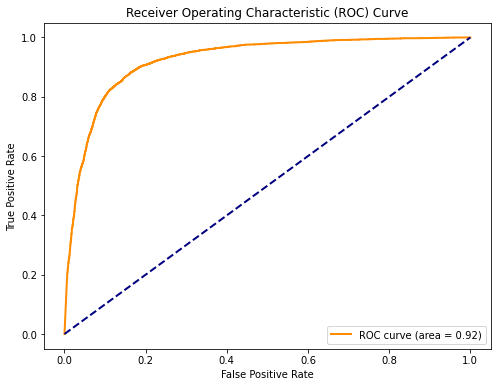

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your movie reviews dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv("IMDB Dataset.csv")

# Convert labels to binary format
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_vectorized, y_train)

# Get predicted probabilities for positive class (class 1)
y_probs = nb_classifier.predict_proba(X_test_vectorized)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


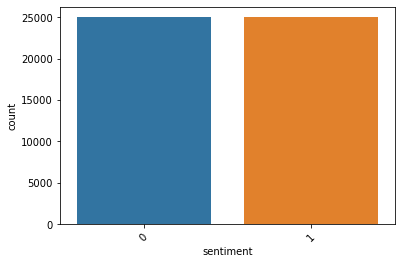

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiment' column contains strings like 'positive', 'negative', etc.
sns.countplot(data=df, x='sentiment')

# Optionally, if you want to rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your movie reviews dataset
# Assuming your dataset has columns 'Review' and 'Rating'
df = pd.read_csv("IMDB Dataset.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_vectorized, y_train)

# Predict ratings for test set
predictions = nb_classifier.predict(X_test_vectorized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report (precision, recall, f1-score)
print(classification_report(y_test, predictions))


Accuracy: 0.86
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your movie reviews dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv("IMDB Dataset.csv")

# Separate features and labels
X = df['review']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiments on the testing set
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {accuracy:.4f}')

# Print classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9007
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib
import tkinter as tk
from tkinter import Text, Label, Button, StringVar

# Load your movie reviews dataset
# Assuming your dataset has columns 'Review' and 'Rating'
df = pd.read_csv("IMDB Dataset.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_vectorized, y_train)

# Save the trained model
joblib.dump(nb_classifier, 'naive_bayes_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

# Load the trained model and vectorizer
loaded_classifier = joblib.load('naive_bayes_model.joblib')
loaded_vectorizer = joblib.load('vectorizer.joblib')

# Function to predict sentiment
def predict_sentiment():
    input_text = text_input.get("1.0", "end-1c")
    input_vectorized = loaded_vectorizer.transform([input_text])
    predictions = loaded_classifier.predict_proba(input_vectorized)[0]
    
    result_var.set(f"Probability of Positive Sentiment: {predictions[1]:.2f}\nProbability of Negative Sentiment: {predictions[0]:.2f}")

# Create a simple Tkinter GUI
root = tk.Tk()
root.title("Sentiment Analysis Prediction")

# Create and configure Text widget for user input
text_input = Text(root, height=10, width=50)
text_input.pack()

# Create and configure Button for prediction
predict_button = Button(root, text="Predict Sentiment", command=predict_sentiment)
predict_button.pack()

# Create and configure Label to display prediction result
result_var = StringVar()
result_label = Label(root, textvariable=result_var)
result_label.pack()

# Start the Tkinter event loop
root.mainloop()
